#### Author: Emad Abdalghaffar
#### 2022 - Information Technology Institute (ITI)

#### Problem: Newton & Quasi-Newton (BFGS) Optimization Algorithms
#### $\;\;\;\;\;\;\;\;\;\;\;\;$ For Quadratic Functions (Single and Multivariant)

<br>Provided are the codes of the Newton's and Quasi-Newton optimizers:

- Secant and Newton Root-Finding Algorithms<br>
<br>
- Gradient Descent and Newton Optimization Algorithms $\;\;\;\;\;\;\;\;\;\;\;$ (Quadratic Single-Variable function)<br>
<br>
- Gradient Descent and Newton Optimization Algorithms $\;\;\;\;\;\;\;\;\;\;\;$ (Quadratic Multivariant functions)<br>
<br>
- Quasi Newton (BFGS) Optimization Algorithm $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (Quadratic Multivariant functions)<br>
<br>

#### General structure for the provided codes:

In [1]:
# the function and its 1st and 2nd derivtives

# optimization function (args; the optimized function, the opt method, initial points, gradient threshold, learning rate, max number of iterations)

    # vectorizing the initials     (in case of multivariants functions)
    
    # optimization loop
    
        # specifying the optimization approach (i.e.: GD, Newton or BFGS)
        
        # variables update
        
        # convergance criteria (gradient threshold)
        
        # iteration counter
        
        # checking the type of the found optimum: min/max/saddle
        
        # displaying the value of the 2nd_derivateve/eigen, in case if single/multivariant function, respectively.
        
    # return: optimum variables, number of executed iteraions

In [2]:
# imports
import numpy as np
from sympy import plot, symbols
from sympy.plotting import plot3d

## Secant and Newton Root-Finding Algorithms
𝒇(𝒙)= $𝒙^𝟑−𝒙^𝟐−𝟏𝟓𝒙+𝟏$


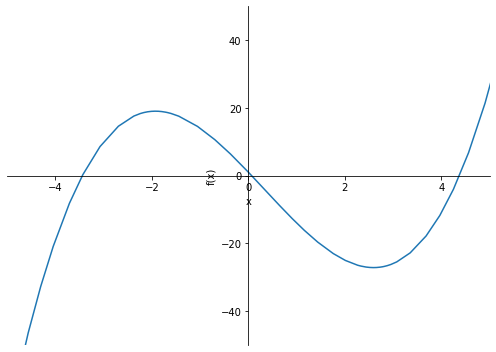

In [3]:
# Function plotting

x,y = symbols('x y')
f= x**3 - x**2 - 15*x + 1
plot(f, ylim=(-50, 50), xlim=(-5, 5), size=(7,5));

In [4]:
fun= lambda x: x**3 - x**2 - 15*x +1
fun_dash= lambda x: 3*x**2 - 2*x - 15

def root_finding(method:["Secant", "Newton"], x_curr, x_prev, threshold, max_iterations):  #trying yet to find how x_prev wouldn't be required in the function call in case of method="Newton".
    
    for i in range (max_iterations):
        
        if method == "Secant":
            x_new= x_curr - (fun(x_curr)*(x_prev-x_curr)/(fun(x_prev)-fun(x_curr)))
            if np.abs(fun(x_new)) < threshold:
                iteration_no= i+1
                break
            x_prev, x_curr= x_curr, x_new
            
        elif method == "Newton":
            x_new= x_curr - (fun(x_curr)/fun_dash(x_curr))
            if np.abs(fun(x_new)) < threshold:
                iteration_no= i+1
                break
            x_curr= x_new
            
    return x_new, iteration_no

In [5]:
# Secant with parameters: x_curr= 4.5, x_prev= 5.5, epsilon = 1e-8
# parameters to find the first root of the function= 4.37

root, no_of_Iter= root_finding("Secant", 4.5, 5.5, 1e-8, 10)
funValue= fun(root)
print("No. of Iterations:\n", no_of_Iter, "\n")
print("Root:\n", root, "\n")
print("Function value:\n", funValue)

No. of Iterations:
 5 

Root:
 4.375753855672038 

Function value:
 3.097966327914037e-12


In [6]:
# Secant with parameters: x_curr= 4.5, x_prev= 0, epsilon = 1e-8
# parameters to find the second root of the function= -3.44

root, no_of_Iter= root_finding("Secant", 4.5, 0, 1e-8, 10)
funValue= fun(root)
print("No. of Iterations:\n", no_of_Iter, "\n")
print("Root:\n", root, "\n")
print("Function value:\n", funValue)

No. of Iterations:
 10 

Root:
 -3.4421461699322515 

Function value:
 -2.842170943040401e-14


In [7]:
# Secant with parameters: x_curr= 4.5, x_prev= 0.1, epsilon = 1e-8
# parameters to find the third root of the function= 0.07

root, no_of_Iter= root_finding("Secant", 4.5, 0.1, 1e-8, 100)
funValue= fun(root)
print("No. of Iterations:\n", no_of_Iter, "\n")
print("Root:\n", root, "\n")
print("Function value:\n", funValue)

No. of Iterations:
 8 

Root:
 0.06639231425996295 

Function value:
 5.167311023512866e-12


In [8]:
# Newton's with parameters: x_curr= 4.5, epsilon = 1e-8
# parameters to find the first root of the function= 4.37

root, no_of_Iter= root_finding("Newton", 4.5, "x_prev not used in newton", 1e-8, 10)
funValue= fun(root)
print("No. of Iterations:\n", no_of_Iter, "\n")
print("Root:\n", root, "\n")
print("Function value:\n", funValue)

No. of Iterations:
 3 

Root:
 4.375753855705814 

Function value:
 1.1410321576477145e-09


In [9]:
# Newton's with parameters: x_curr= -2, epsilon = 1e-8
# parameters to find the second root of the function= -3.44

root, no_of_Iter= root_finding("Newton", -2, "x_prev not used in newton", 1e-8, 10)
funValue= fun(root)
print("No. of Iterations:\n", no_of_Iter, "\n")
print("Root:\n", root, "\n")
print("Function value:\n", funValue)

No. of Iterations:
 10 

Root:
 -3.442146169932357 

Function value:
 -2.9132252166164108e-12


In [10]:
# Newton's with parameters: x_curr= 1, epsilon = 1e-8
# parameters to find the third root of the function= 0.07

root, no_of_Iter= root_finding("Newton", 1, "x_prev not used in newton", 1e-8, 10)
funValue= fun(root)
print("No. of Iterations:\n", no_of_Iter, "\n")
print("Root:\n", root, "\n")
print("Function value:\n", funValue)

No. of Iterations:
 4 

Root:
 0.06639231426030472 

Function value:
 0.0


## Gradient Descent and Newton Optimization Algorithms
#### for Single Variable Quadratic Functions

   𝒇(𝒙)=  $𝒙^𝟐−𝟏𝟓𝒙+𝟏$        
- The stop condition is grad < epsilon.

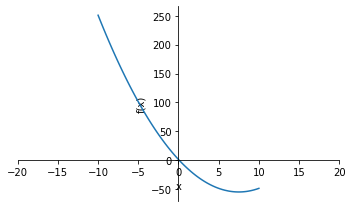

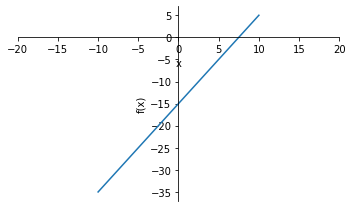

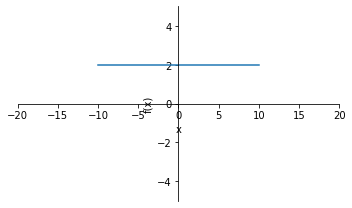

In [15]:
# function plots

x,y = symbols('x y')
f= x**2 - 15*x + 1
plot(f, xlim=(-20,20), size=(5,3))

fDash= 2*x - 15
plot(fDash, xlim=(-20,20), size=(5,3))

fDDash= 2
plot(fDDash, ylim=(-5, 5), xlim=(-20,20), size=(5,3));

In [16]:
sFun= lambda x: x**2 - 15*x + 1
sFun_dash= lambda x: 2*x - 15
sFun_ddash= lambda x: 2

def opt_single(method:["GD", "Newton"], x_curr, threshold, alpha, max_iterations):
    
    for i in range (max_iterations):
        
        if method == "GD":
            
            x_new= x_curr - alpha*sFun_dash(x_curr)
            if np.abs(sFun_dash(x_new)) < threshold:
                iteration_no= i+1
                
                if sFun_ddash(x_new) > 0:
                    print("Stationary: minimum")
                    print("2nd derivative: ", sFun_ddash(x_new))
                elif sFun_ddash(x_new) < 0:
                    print("Stationary: maximum")
                    print("2nd derivative: ", sFun_ddash(x_new))
                else:
                    print("Stationary: saddle")
                    print("2nd derivative: ", sFun_ddash(x_new))
                    
                break
            x_curr= x_new
            
        if method == "Newton":
            
            x_new= x_curr - alpha*sFun_dash(x_curr)/sFun_ddash(x_curr)
            if np.abs(sFun_dash(x_new)) < threshold:
                iteration_no= i+1
                
                if sFun_ddash(x_new) > 0:
                    print("Stationary: minimum")
                    print("2nd derivative: ", sFun_ddash(x_new))
                elif sFun_ddash(x_new) < 0:
                    print("Stationary: maximum")
                    print("2nd derivative: ", sFun_ddash(x_new))
                else:
                    print("Stationary: saddle")
                    print("2nd derivative: ", sFun_ddash(x_new))
                    
                break
            x_curr= x_new
            
    return x_new, iteration_no

In [17]:
# Gradient descent with parameters: learning rate = 0.01, x0=40, epsilon = 0.1

x_min, no_of_Iter= opt_single("GD", 40, 0.1, 0.01, 500)
funValue= sFun(x_min)
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", x_min, "\n")
print("Function value:\n", funValue)

Stationary: minimum
2nd derivative:  2

No. of Iterations:
 321 

X:
 7.549596800192111 

Function value:
 -55.24754015741071


In [18]:
# Newton's method without learning rate, x0=40, epsilon = 0.1

x_min, no_of_Iter= opt_single("Newton", 40, 0.1, 1, 500)
funValue= sFun(x_min)
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", x_min, "\n")
print("Function value:\n", funValue)

Stationary: minimum
2nd derivative:  2

No. of Iterations:
 1 

X:
 7.5 

Function value:
 -55.25


In [19]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1

x_min, no_of_Iter= opt_single("Newton", 40, 0.1, 0.8, 500)
funValue= sFun(x_min)
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", x_min, "\n")
print("Function value:\n", funValue)

Stationary: minimum
2nd derivative:  2

No. of Iterations:
 5 

X:
 7.5104 

Function value:
 -55.24989184


## Gradient Descent and Newton Optimization Algorithms
#### for Multi Variable Quadratic Functions

   𝒇(𝒙)= $𝒙^𝟐+y^2$ </br>
   𝒇(𝒙)= $𝒙^𝟐+xy+y^2$  
   𝒇(𝒙)= $𝒙^𝟐y$ 
- The stop condition is grad < epsilon.

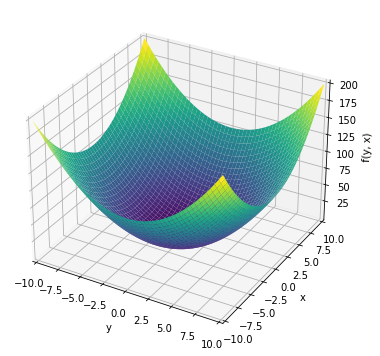

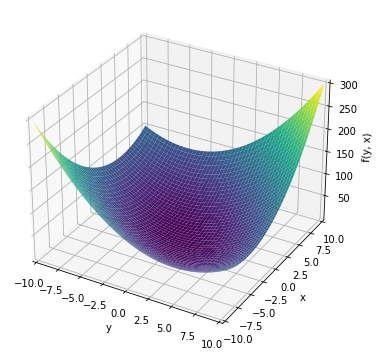

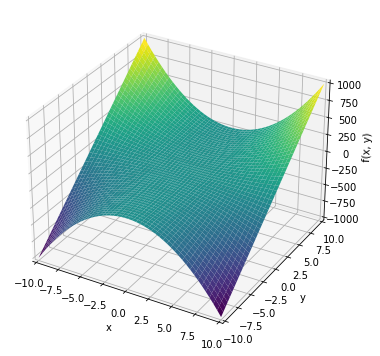

In [22]:
# function plots

# function 1
x,y = symbols('x y')
mf1 = x**2 + y**2
plot3d(mf1,size=(7,5));

# function 2
x,y = symbols('x y')
mf2 = x**2 + x * y + y**2
plot3d(mf2,size=(7,5));

# function 3
x,y = symbols('x y')
mf3 = x**2 * y
plot3d(mf3,size=(7,5));

In [23]:
# Function 1
mFun1= lambda x,y: x**2 + y**2
mFun1_dash= lambda x,y: np.array([[2*x],
                                [2*y]])
mFun1_ddash= lambda x,y: np.array([[2, 0],
                                [0, 2]])
# Function 2
mFun2= lambda x,y: x**2 + x*y + y**2
mFun2_dash= lambda x,y: np.array([[2*x + y],
                                [2*y + x]])
mFun2_ddash= lambda x,y: np.array([[2, 1],
                                [1, 2]])
# Function 3
mFun3= lambda x,y: x**2 * y
mFun3_dash= lambda x,y: np.array([[2*x*y],
                                [x**2]])
mFun3_ddash= lambda x,y: np.array([[2*y, 2*x],
                                [2*x, 0]])


def opt_multi(mFun, mFun_dash, mFun_ddash, method:["GD", "Newton"], x_curr, y_curr, threshold, alpha, max_iterations):
    
    X_curr= np.array([[x_curr],
                     [y_curr]])
    
    for i in range (max_iterations):
        
        if method == "GD":
            X_new= X_curr - alpha*mFun_dash(X_curr[0][0], X_curr[1][0])
            if (np.abs(mFun_dash(X_new[0][0], X_new[1][0])[0][0]) < threshold) and (np.abs(mFun_dash(X_new[0][0], X_new[1][0])[1][0]) < threshold):
                iteration_no= i+1
                
                if (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0])) > 0).all():
                    print("Stationary: minimum")
                    print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))
                elif (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0])) < 0).all():
                    print("Stationary: maximum")
                    print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))

                else:
                    print("Stationary: saddle")
                    print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))

                break
            X_curr= X_new
            
        if method == "Newton":
            X_new= X_curr - alpha*(np.linalg.inv(mFun_ddash(X_curr[0][0], X_curr[1][0])).dot(mFun_dash(X_curr[0][0], X_curr[1][0])))
            if (np.abs(mFun_dash(X_new[0][0], X_new[1][0])[0][0]) < threshold) and (np.abs(mFun_dash(X_new[0][0], X_new[1][0])[1][0]) < threshold):
                iteration_no= i+1
                
                if (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0])) > 0).all():
                    print("Stationary: minimum")
                    print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))
                elif (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0])) < 0).all():
                    print("Stationary: maximum")
                    print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))
                else:
                    print("Stationary: saddle")
                    print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))
                
                break
            X_curr= X_new
            
    return X_new, iteration_no

In [24]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun1, mFun1_dash, mFun1_ddash, "GD", 10, 10, 0.001, 0.1, 100)
funValue= mFun1(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [2. 2.]

No. of Iterations:
 45 

X:
 0.0004355614296588014 

Y:
 0.0004355614296588014 

Function value:
 3.7942751801283795e-07


In [25]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun1, mFun1_dash, mFun1_ddash, "Newton", 10, 10, 0.001, 1, 100)
funValue= mFun1(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [2. 2.]

No. of Iterations:
 1 

X:
 0.0 

Y:
 0.0 

Function value:
 0.0


In [26]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun1, mFun1_dash, mFun1_ddash, "Newton", 10, 10, 0.001, 0.5, 100)
funValue= mFun1(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [2. 2.]

No. of Iterations:
 15 

X:
 0.00030517578125 

Y:
 0.00030517578125 

Function value:
 1.862645149230957e-07


In [27]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun2, mFun2_dash, mFun2_ddash, "GD", 10, 10, 0.001, 0.5, 100)
funValue= mFun2(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [3. 1.]

No. of Iterations:
 15 

X:
 -0.00030517578125 

Y:
 -0.00030517578125 

Function value:
 2.7939677238464355e-07


In [28]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun2, mFun2_dash, mFun2_ddash, "Newton", 10, 10, 0.001, 1, 100)
funValue= mFun2(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [3. 1.]

No. of Iterations:
 1 

X:
 0.0 

Y:
 0.0 

Function value:
 0.0


In [29]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun2, mFun2_dash, mFun2_ddash, "Newton", 10, 10, 0.001, 0.9, 100)
funValue= mFun2(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [3. 1.]

No. of Iterations:
 5 

X:
 9.999999999999994e-05 

Y:
 9.999999999999994e-05 

Function value:
 2.9999999999999964e-08


In [30]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun3, mFun3_dash, mFun3_ddash, "GD", 10, 10, 0.001, 0.01, 100)
funValue= mFun3(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: saddle
Eigenvalues:  [ 1.37012238e+01 -1.35232945e-09]

No. of Iterations:
 79 

X:
 6.805984207983023e-05 

Y:
 6.8506118908142435 

Function value:
 3.173300777713396e-08


In [31]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun3, mFun3_dash, mFun3_ddash, "Newton", 10, 10, 0.001, 1, 1000)
funValue= mFun3(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: saddle
Eigenvalues:  [ 0.06320445 -0.02414195]

No. of Iterations:
 9 

X:
 0.01953125 

Y:
 0.01953125 

Function value:
 7.450580596923828e-06


In [32]:
# Third function
# Multi-variable Newton's method with learning rate = 0.7, 
# x0=(10,10), epsilon = 0.001

X_min, no_of_Iter= opt_multi(mFun3, mFun3_dash, mFun3_ddash, "Newton", 10, 10, 0.001, 0.7, 100)
funValue= mFun3(X_min[0][0], X_min[1][0])
print("\nNo. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: saddle
Eigenvalues:  [ 0.05054963 -0.01930824]

No. of Iterations:
 15 

X:
 0.01562069488955406 

Y:
 0.015620694889554065 

Function value:
 3.8115449772604354e-06


## Quasi-Newton (BFGS) Optimization Algorithm
#### for Multi Variable Quadratic Functions:

   𝒇(𝒙)= $𝒙^𝟐+y^2$ </br>
   𝒇(𝒙)= $𝒙^𝟐+xy+y^2$  
   𝒇(𝒙)= $𝒙^𝟐y$ 
- The stop condition is grad < epsilon.

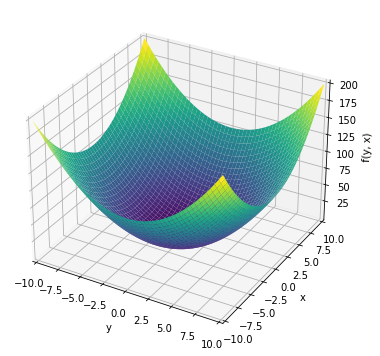

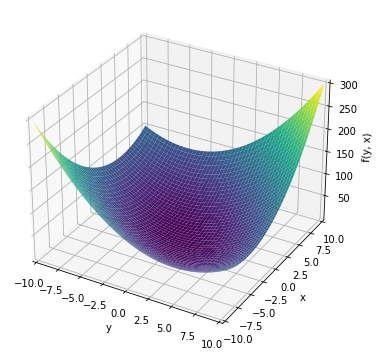

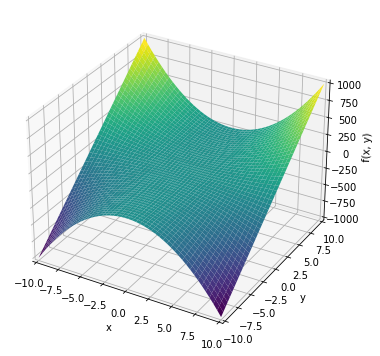

In [33]:
# function plots

# function 1
x,y = symbols('x y')
mf1 = x**2 + y**2
plot3d(mf1,size=(7,5));

# function 2
x,y = symbols('x y')
mf2 = x**2 + x * y + y**2
plot3d(mf2,size=(7,5));

# function 3
x,y = symbols('x y')
mf3 = x**2 * y
plot3d(mf3,size=(7,5));

In [34]:
# Function 1
mFun1= lambda x,y: x**2 + y**2
mFun1_dash= lambda x,y: np.array([[2*x],
                                [2*y]])
mFun1_ddash= lambda x,y: np.array([[2, 0],
                                [0, 2]])
# Function 2
mFun2= lambda x,y: x**2 + x*y + y**2
mFun2_dash= lambda x,y: np.array([[2*x + y],
                                [2*y + x]])
mFun2_ddash= lambda x,y: np.array([[2, 1],
                                [1, 2]])
# Function 3
mFun3= lambda x,y: x**2 * y
mFun3_dash= lambda x,y: np.array([[2*x*y],
                                [x**2]])
mFun3_ddash= lambda x,y: np.array([[2*y, 2*x],
                                [2*x, 0]])


def opt_multi_BFGS(mFun, mFun_dash, mFun_ddash, x_curr, y_curr, x_prev, y_prev, threshold, alpha, max_iterations):
    
    X_curr= np.array([[x_curr],
                     [y_curr]])
    X_prev= np.array([[x_prev],
                     [y_prev]])
    
    for i in range (max_iterations):

        delta_X= X_curr - X_prev
        Y= (mFun_dash(X_curr[0][0], X_curr[1][0]) - mFun_dash(X_prev[0][0], X_prev[1][0]))
        B_inv_prev= np.identity(2, dtype = float)
        I= np.identity(2, dtype = float)
        B_inv= ((I - (delta_X.dot(Y.transpose()))/(Y.transpose().dot(delta_X))).dot(B_inv_prev).dot(
                                    (I - (Y.dot(delta_X.transpose()))/(Y.transpose().dot(delta_X))))) + ((delta_X.dot(delta_X.transpose()))/(Y.transpose().dot(delta_X)))
        X_new= X_curr - alpha*(B_inv.dot(mFun_dash(X_curr[0][0], X_curr[1][0])))
        if (np.abs(mFun_dash(X_new[0][0], X_new[1][0])[0][0]) < threshold) and (np.abs(mFun_dash(X_new[0][0], X_new[1][0])[1][0]) < threshold):
            iteration_no= i+1
            
            if (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0])) > 0).all():
                print("Stationary: minimum")
                print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))
            elif (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0])) < 0).all():
                print("Stationary: maximum")
                print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))
            else:
                print("Stationary: saddle")
                print("Eigenvalues: ", (np.linalg.eigvals(mFun_ddash(X_new[0][0], X_new[1][0]))))
                    
            break
        X_prev, X_curr= X_curr, X_new
        B_inv_prev= B_inv
            
    return X_new, iteration_no

In [35]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001

X_min, no_of_Iter= opt_multi_BFGS(mFun1, mFun1_dash, mFun1_ddash, 9, 9, 10, 10, 0.001, 1, 100)
funValue= mFun1(X_min[0][0], X_min[1][0])
print("No. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [2. 2.]
No. of Iterations:
 1 

X:
 0.0 

Y:
 0.0 

Function value:
 0.0


In [36]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9

X_min, no_of_Iter= opt_multi_BFGS(mFun1, mFun1_dash, mFun1_ddash, 9, 9, 10, 10, 0.001, 0.9, 100)
funValue= mFun1(X_min[0][0], X_min[1][0])
print("No. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [2. 2.]
No. of Iterations:
 5 

X:
 8.999999999999991e-05 

Y:
 8.999999999999991e-05 

Function value:
 1.6199999999999966e-08


In [37]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001

X_min, no_of_Iter= opt_multi_BFGS(mFun2, mFun2_dash, mFun2_ddash, 9, 9, 10, 10, 0.001, 1, 100)
funValue= mFun2(X_min[0][0], X_min[1][0])
print("No. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [3. 1.]
No. of Iterations:
 1 

X:
 1.7763568394002505e-15 

Y:
 1.7763568394002505e-15 

Function value:
 9.466330862652142e-30


In [38]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9

X_min, no_of_Iter= opt_multi_BFGS(mFun2, mFun2_dash, mFun2_ddash, 9, 9, 10, 10, 0.001, 0.9, 100)
funValue= mFun2(X_min[0][0], X_min[1][0])
print("No. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: minimum
Eigenvalues:  [3. 1.]
No. of Iterations:
 5 

X:
 9.000000000000024e-05 

Y:
 9.000000000000024e-05 

Function value:
 2.4300000000000128e-08


In [39]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001

X_min, no_of_Iter= opt_multi_BFGS(mFun3, mFun3_dash, mFun3_ddash, 9, 9, 10, 10, 0.001, 1, 100)
funValue= mFun3(X_min[0][0], X_min[1][0])
print("No. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: saddle
Eigenvalues:  [ 0.0496414  -0.01896133]
No. of Iterations:
 13 

X:
 0.01534003736956394 

Y:
 0.015340037754480475 

Function value:
 3.6097677755656535e-06


In [40]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
## learning rate  = 0.9

X_min, no_of_Iter= opt_multi_BFGS(mFun3, mFun3_dash, mFun3_ddash, 9, 9, 10, 10, 0.001, 0.9, 100)
funValue= mFun3(X_min[0][0], X_min[1][0])
print("No. of Iterations:\n", no_of_Iter, "\n")
print("X:\n", X_min[0][0], "\n")
print("Y:\n", X_min[1][0], "\n")
print("Function value:\n", funValue)

Stationary: saddle
Eigenvalues:  [ 0.05936731 -0.02267629]
No. of Iterations:
 14 

X:
 0.018345506998081233 

Y:
 0.01834550818625052 

Function value:
 6.174320701578955e-06


# End